# CAB INVESTMENT ANALYSIS BY CHUKWUJEKWU JOSEPH EZEMA -13/02/23

## 1.0 LOAD DATASET

In [1]:
# 1.1 Import and Install Libraries
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import pandas as pd
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from plotly.subplots import make_subplots

#date libraries
from datetime import datetime

# display all columns of the dataset
pd.pandas.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

#Confirmation
print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Load datasets

# Reading the Cab Data File - dataset for the features
cab = pd.read_csv('Cab_Data.csv')

cab_copy = cab.copy() #making a copy
cab_copy

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.6350
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.8540
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.6320
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.6020
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.7760
...,...,...,...,...,...,...,...
359387,10440101,43108,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600
359388,10440104,43104,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480
359389,10440105,43105,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500
359390,10440106,43105,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480


In [3]:
# Reading the City File 
city = pd.read_csv('City.csv')

city_copy = city.copy() #making a copy
city_copy

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"
5,ORANGE COUNTY,"1,030,185","12,994"
6,SAN DIEGO CA,"959,307","69,995"
7,PHOENIX AZ,"943,999","6,133"
8,DALLAS TX,"942,908","22,157"
9,ATLANTA GA,"814,885","24,701"


In [4]:
# Reading the Customer File
customer = pd.read_csv('Customer_ID.csv')

customer_copy = customer.copy() #making a copy
customer_copy

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536
...,...,...,...,...
49166,12490,Male,33,18713
49167,14971,Male,30,15346
49168,41414,Male,38,3960
49169,41677,Male,23,19454


In [5]:
# Reading the Transaction File 
transaction = pd.read_csv('Transaction_ID.csv')

transaction_copy = transaction.copy() #making a copy
transaction_copy

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card
...,...,...,...
440093,10440104,53286,Cash
440094,10440105,52265,Cash
440095,10440106,52175,Card
440096,10440107,52917,Card


In [6]:
# Load the US holiday data
us_holiday = pd.read_csv('US Holiday Dates (2004-2021).csv')

us_holiday_copy = us_holiday.copy() #making a copy
us_holiday_copy

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008
...,...,...,...,...,...,...
337,2006-04-16,Western Easter,Sunday,4,16,2006
338,2017-04-16,Western Easter,Sunday,4,16,2017
339,2014-04-20,Western Easter,Sunday,4,20,2014
340,2019-04-21,Western Easter,Sunday,4,21,2019


## 2.0 EXPLORATORY DATA ANALYSIS (EDA)

### 2.1 Cab Data EDA

In [7]:
# Display the first 5 rows
cab.head()

,Transaction ID,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [8]:
# Print the shape of the data
cab.shape

(359392, 7)

In [9]:
# Check the data types and missing values in the dataset
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Transaction ID  359392 non-null  int64  
 1   Date of Travel  359392 non-null  int64  
 2   Company         359392 non-null  object 
 3   City            359392 non-null  object 
 4   KM Travelled    359392 non-null  float64
 5   Price Charged   359392 non-null  float64
 6   Cost of Trip    359392 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 19.2+ MB


In [10]:
# Convert Date of Travel to Actual Datetime datatype

import xlrd #this library converts excel date number to datetime

cab['Date of Travel'] = cab['Date of Travel'].apply(lambda x : xlrd.xldate_as_datetime(x, 0))

#confirm transformation
cab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Transaction ID  359392 non-null  int64         
 1   Date of Travel  359392 non-null  datetime64[ns]
 2   Company         359392 non-null  object        
 3   City            359392 non-null  object        
 4   KM Travelled    359392 non-null  float64       
 5   Price Charged   359392 non-null  float64       
 6   Cost of Trip    359392 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 19.2+ MB


In [11]:
# Descriptive statistics for the numerical variables in the dataset except the key column (Transaction ID)
cab[['KM Travelled','Price Charged','Cost of Trip']].describe()

,KM Travelled,Price Charged,Cost of Trip
count,359392.000000,359392.000000,359392.000000
mean,22.567254,423.443311,286.190113
std,12.233526,274.378911,157.993661
min,1.900000,15.600000,19.000000
25%,12.000000,206.437500,151.200000
50%,22.440000,386.360000,282.480000
75%,32.960000,583.660000,413.683200
max,48.000000,2048.030000,691.200000


In [12]:
# Check unique ID:
print("Number of unique IDs: {}".format(len(cab['Transaction ID'].unique())))

#Check duplicated IDs:
print("Number of duplicated records before dropping:",cab['Transaction ID'].duplicated().sum())

Number of unique IDs: 359392
Number of duplicated records before dropping: 0


In [13]:
# Check for missing values
cab.isnull().sum()

Transaction ID    0
Date of Travel    0
Company           0
City              0
KM Travelled      0
Price Charged     0
Cost of Trip      0
dtype: int64

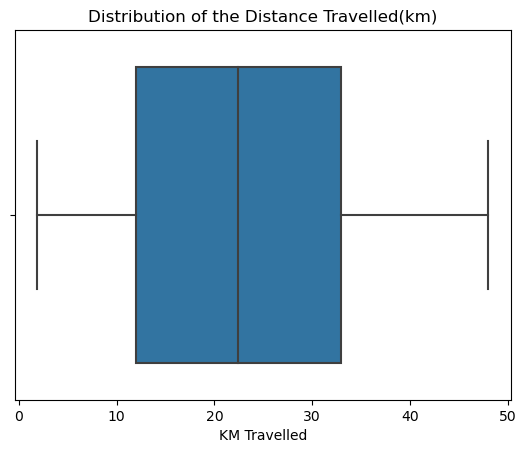

In [14]:
# VISUALIZE OBSERVATIONS

# Check for outliers through the distribution of distance
sns.boxplot(cab['KM Travelled'])
plt.title('Distribution of the Distance Travelled(km)')
plt.show()


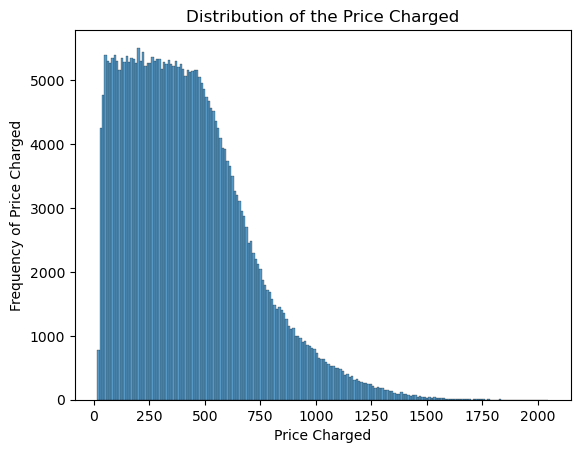

In [15]:
# Check the distribution of the Price Charged
sns.histplot(cab['Price Charged'])
plt.title('Distribution of the Price Charged')
plt.ylabel('Frequency of Price Charged')
plt.show()

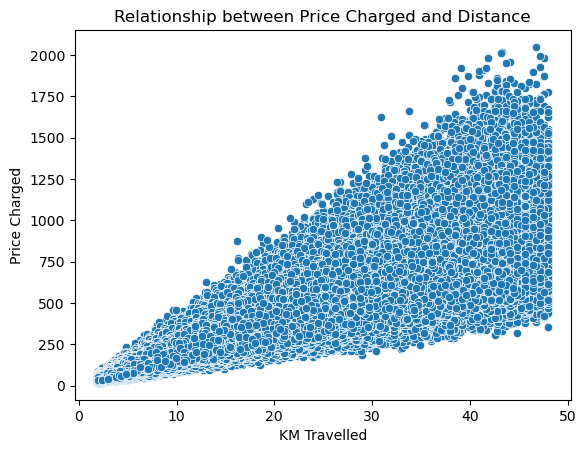

In [16]:
# Check the relationship between fare and distance
sns.scatterplot(data=cab, x='KM Travelled', y='Price Charged')
plt.title('Relationship between Price Charged and Distance')
plt.show()

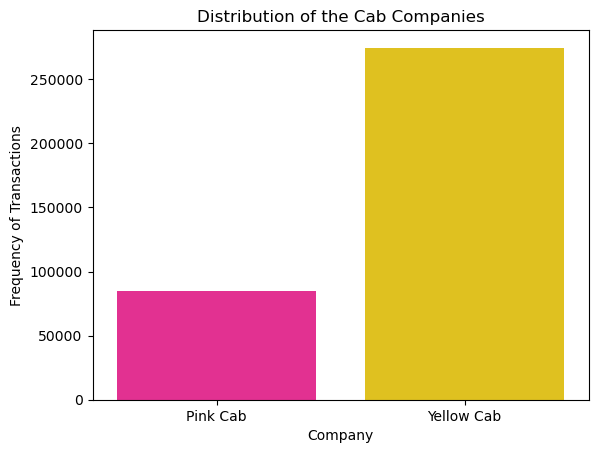

In [17]:
# Check Distribution of Cab Company
company_palette = {'Yellow Cab': 'gold', 'Pink Cab': 'deeppink'} # Define a custom color palette
sns.countplot(data=cab, x='Company', palette=company_palette)
plt.title('Distribution of the Cab Companies')
plt.ylabel('Frequency of Transactions')
plt.show()

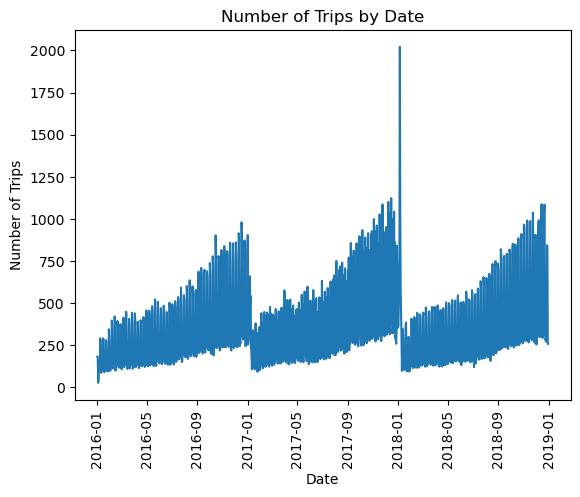

In [18]:
# Check the distribution of trips by date

# Create a new dataframe with the count of trips per date
trips_by_date = cab.groupby('Date of Travel')['Transaction ID'].count().reset_index()
trips_by_date.columns = ['Date', 'Trips']

# Create the line plot
plt.plot(trips_by_date['Date'], trips_by_date['Trips'])

# Set the title and axis labels
plt.title('Number of Trips by Date')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

### 2.2 Customer Demographics EDA

In [19]:
# The first 5 rows
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [20]:
# The shape of the data
customer.shape

(49171, 4)

In [21]:
# Check the data types and missing values in the dataset
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49171 entries, 0 to 49170
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Customer ID         49171 non-null  int64 
 1   Gender              49171 non-null  object
 2   Age                 49171 non-null  int64 
 3   Income (USD/Month)  49171 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [22]:
# Descriptive statistics for the numerical variables in the dataset except the Customer ID
customer[['Age','Income (USD/Month)']].describe()

,Age,Income (USD/Month)
count,49171.000000,49171.000000
mean,35.363121,15015.631856
std,12.599066,8002.208253
min,18.000000,2000.000000
25%,25.000000,8289.500000
50%,33.000000,14656.000000
75%,42.000000,21035.000000
max,65.000000,35000.000000


In [23]:
# Check unique ID:
print("Number of unique IDs: {}".format(len(customer['Customer ID'].unique())))

#Check duplicated IDs:
print("Number of duplicated records before dropping:",customer['Customer ID'].duplicated().sum())

Number of unique IDs: 49171
Number of duplicated records before dropping: 0


In [24]:
# Check for missing values
customer.isnull().sum()

Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
dtype: int64

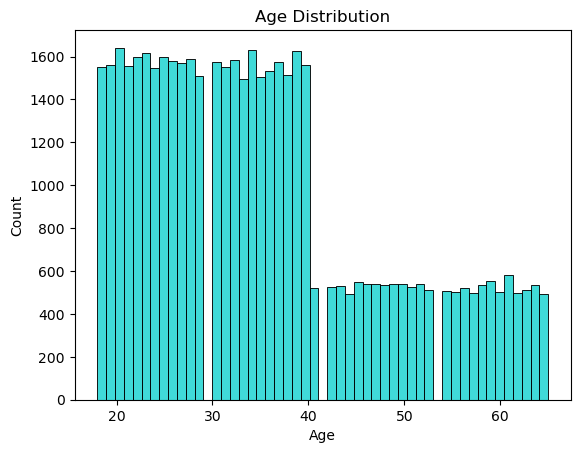

In [25]:
# VISUALIZE OBSERVATIONS

# Check the distribution of age
sns.histplot(customer['Age'], color = '#00CECB')
plt.title('Age Distribution')
plt.show()

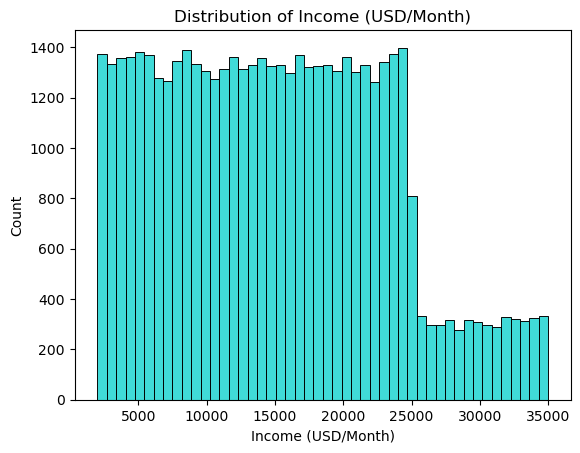

In [26]:
# Check the distribution of income
sns.histplot(customer['Income (USD/Month)'], color = '#00CECB')
plt.title('Distribution of Income (USD/Month)')
plt.show()

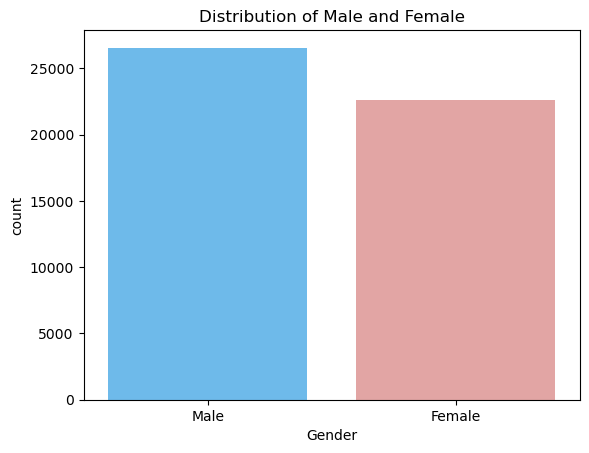

In [27]:
# Check the distribution of gender
gender_palette = {'Male': "#59BFFF", 
                   'Female': "#EC9B9A"}
sns.countplot(customer['Gender'], palette=gender_palette)
plt.title('Distribution of Male and Female')
plt.show()

### 2.3 Transaction Data EDA

In [28]:
# The first 5 rows
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [29]:
# Print the shape of the data
transaction.shape

(440098, 3)

In [30]:
# Check the data types and missing values in the dataset
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440098 entries, 0 to 440097
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Transaction ID  440098 non-null  int64 
 1   Customer ID     440098 non-null  int64 
 2   Payment_Mode    440098 non-null  object
dtypes: int64(2), object(1)
memory usage: 10.1+ MB


In [31]:
# Check for missing values
transaction.isnull().sum()

Transaction ID    0
Customer ID       0
Payment_Mode      0
dtype: int64

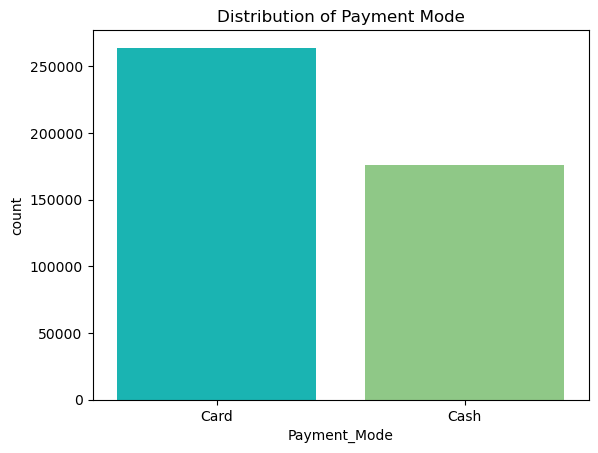

In [32]:
# VISUALIZE OBSERVATIONS

# Check the distribution of payment mode
payment_palette = {'Cash': '#87D37C', 
                   'Card': '#00CECB'}
sns.countplot(x="Payment_Mode", data=transaction, palette=payment_palette)
plt.title('Distribution of Payment Mode')
plt.show()


### 2.4 City Data EDA

In [33]:
# View the first few rows of the data
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [34]:
# View the data types and non-null values of each column
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 608.0+ bytes


In [35]:
# Convert Population and Users columns to number type
city['Population'] = pd.to_numeric(city['Population'].str.replace(',','')) #removes the comma so it can be recognzed as a number
city['Users'] = pd.to_numeric(city['Users'].str.replace(',','')) 

#confirm the transformation
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     int64 
 2   Users       20 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 608.0+ bytes


In [36]:
# Calculate summary statistics for numerical columns
city.describe()

,Population,Users
count,2.000000e+01,20.000000
mean,1.231592e+06,64520.650000
std,1.740127e+06,83499.375289
min,2.489680e+05,3643.000000
25%,6.086372e+05,11633.250000
50%,7.845590e+05,23429.000000
75%,1.067041e+06,91766.000000
max,8.405837e+06,302149.000000


In [37]:
# Identify any missing values in the data
city.isnull().sum()

City          0
Population    0
Users         0
dtype: int64

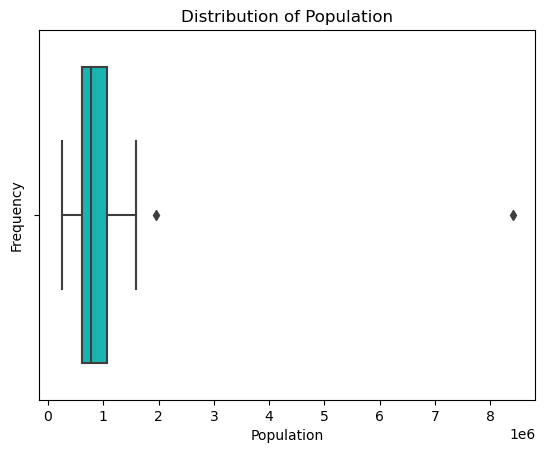

In [38]:
# VISUALIZE OBSERVATIONS

# Visualize the distribution of the population 
sns.boxplot(city['Population'], color = '#00CECB')  
plt.title('Distribution of Population')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.show()


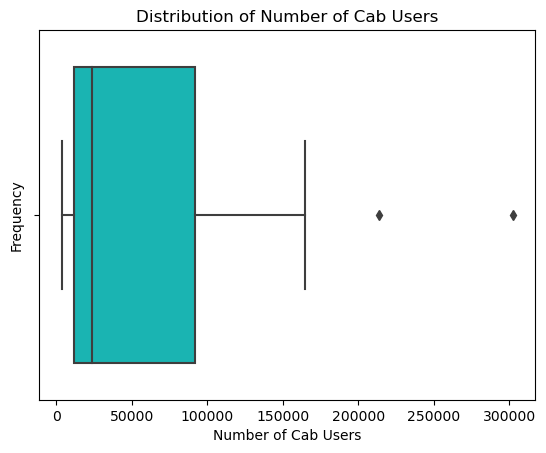

In [39]:
# Distribution of cab users using a histogram
sns.boxplot(city['Users'], color = '#00CECB') 
plt.title('Distribution of Number of Cab Users')
plt.xlabel('Number of Cab Users')
plt.ylabel('Frequency')
plt.show()

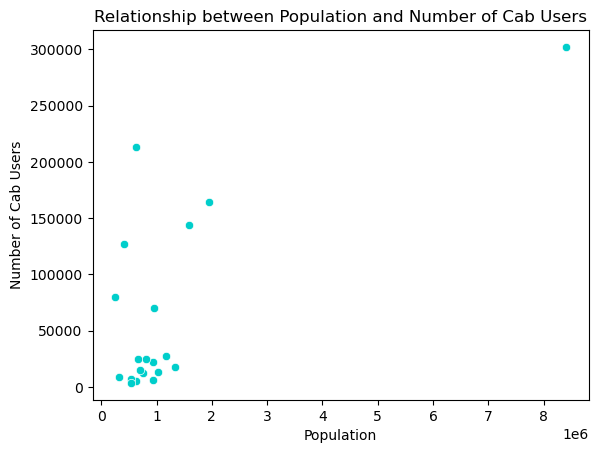

In [40]:
# Create a scatter plot to show the relationship between population and number of cab users
sns.scatterplot(data=city, x='Population', y='Users', color = '#00CECB')
plt.title('Relationship between Population and Number of Cab Users')
plt.xlabel('Population')
plt.ylabel('Number of Cab Users')
plt.show()

### 2.5 US Holiday Data (Third-party  Dataset)

In [41]:
# The first 5 rows
us_holiday.head()

,Date,Holiday,WeekDay,Month,Day,Year
0,2004-07-04,4th of July,Sunday,7,4,2004
1,2005-07-04,4th of July,Monday,7,4,2005
2,2006-07-04,4th of July,Tuesday,7,4,2006
3,2007-07-04,4th of July,Wednesday,7,4,2007
4,2008-07-04,4th of July,Friday,7,4,2008


In [42]:
# Print the shape of the data
us_holiday.shape

(342, 6)

In [43]:
# View the data types and non-null values of each column
us_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     342 non-null    object
 1   Holiday  342 non-null    object
 2   WeekDay  342 non-null    object
 3   Month    342 non-null    int64 
 4   Day      342 non-null    int64 
 5   Year     342 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 16.2+ KB


In [44]:
# Convert date  column datetime datatype
us_holiday['Date'] = pd.to_datetime(us_holiday['Date'])

#confirm transformation
us_holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342 entries, 0 to 341
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     342 non-null    datetime64[ns]
 1   Holiday  342 non-null    object        
 2   WeekDay  342 non-null    object        
 3   Month    342 non-null    int64         
 4   Day      342 non-null    int64         
 5   Year     342 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 16.2+ KB


In [45]:
# Check for missing values
us_holiday.isnull().sum()

Date       0
Holiday    0
WeekDay    0
Month      0
Day        0
Year       0
dtype: int64

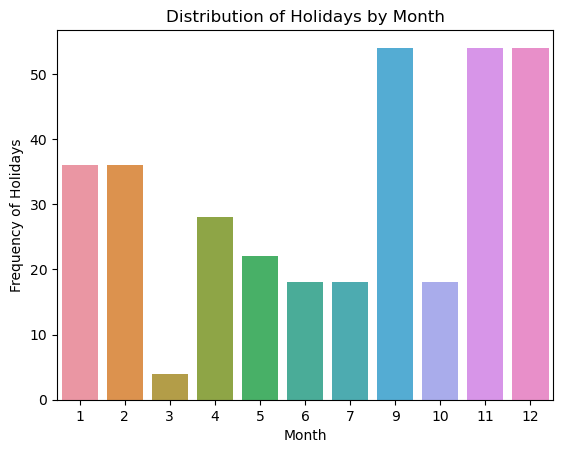

In [46]:
# VISUALIZE OBSERVATIONS

# Check the distribution of holidays by month
sns.countplot(us_holiday['Month'])
plt.title('Distribution of Holidays by Month')
plt.ylabel('Frequency of Holidays')
plt.show()

### 2.6 Further Analysis on the Combined Data

In [47]:
# combine the dataset simultaneouly 

# merge city dataset to the cab data
cab_data = cab.merge(city, on="City", how='left')

# merge customer dataset to transaction
tranx_data = transaction.merge(customer, on="Customer ID", how='left')

#creating a master's data from the given datasets using inner join to remove unwanted rows
data = tranx_data.merge(cab_data, on="Transaction ID", how='inner')
data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,814885,24701
1,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,814885,24701
2,10000013,28712,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,814885,24701
3,10000014,28020,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,814885,24701
4,10000015,27182,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,814885,24701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,418859,127001
359388,10440104,53286,Cash,Male,32,6528,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,418859,127001
359389,10440105,52265,Cash,Male,56,7966,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,418859,127001
359390,10440106,52175,Card,Male,32,6423,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,418859,127001


In [48]:
# Round the cost of trip column to 2 decimal places just like others
data["Cost of Trip"]=np.round(data["Cost of Trip"],2)

#Exploring the nature of the combined data
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 0 to 359391
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Transaction ID      359392 non-null  int64         
 1   Customer ID         359392 non-null  int64         
 2   Payment_Mode        359392 non-null  object        
 3   Gender              359392 non-null  object        
 4   Age                 359392 non-null  int64         
 5   Income (USD/Month)  359392 non-null  int64         
 6   Date of Travel      359392 non-null  datetime64[ns]
 7   Company             359392 non-null  object        
 8   City                359392 non-null  object        
 9   KM Travelled        359392 non-null  float64       
 10  Price Charged       359392 non-null  float64       
 11  Cost of Trip        359392 non-null  float64       
 12  Population          359392 non-null  int64         
 13  Users               359392 no

In [49]:
# Check unique ID:
print("Number of unique IDs: {}".format(len(data['Transaction ID'].unique())))

#Check duplicated IDs:
print("Number of duplicated records before dropping:",data['Transaction ID'].duplicated().sum())

Number of unique IDs: 359392
Number of duplicated records before dropping: 0


In [50]:
# Statistical Summary
num_col = data.select_dtypes(include=np.number)
num_col.drop(columns=['Transaction ID','Customer ID'],inplace=True) #removing unwanted columns
num_col.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,359392.0,3.533670e+01,1.259423e+01,18.0,25.0000,33.00,42.00,65.00
Income (USD/Month),359392.0,1.504882e+04,7.969409e+03,2000.0,8424.0000,14685.00,21035.00,35000.00
KM Travelled,359392.0,2.256725e+01,1.223353e+01,1.9,12.0000,22.44,32.96,48.00
Price Charged,359392.0,4.234433e+02,2.743789e+02,15.6,206.4375,386.36,583.66,2048.03
Cost of Trip,359392.0,2.861901e+02,1.579937e+02,19.0,151.2000,282.48,413.68,691.20
Population,359392.0,3.132198e+06,3.315194e+06,248968.0,671238.0000,1595037.00,8405837.00,8405837.00
Users,359392.0,1.583656e+05,1.008501e+05,3643.0,80021.0000,144132.00,302149.00,302149.00


In [51]:
# Create custom columns...

# Year column
data['Year'] = data['Date of Travel'].apply(lambda t: "CY"+str(t.year))

# Quarter column
data['Quarter'] = data['Date of Travel'].apply(lambda time: "Q"+str(time.quarter))

# Month column
data['Month'] = data['Date of Travel'].apply(lambda time: time.month_name())

# Day column
data['Day'] = data['Date of Travel'].apply(lambda time: time.day_name())

# Profit column
data["Profit"]=np.round(data["Price Charged"]-data["Cost of Trip"],2)

# City Usage (percentage of users per city population)
data["City %Usage"]=np.round((data["Users"]/data["Population"])*100,2)

# Income status
def income_stats(value):
    if value > data['Income (USD/Month)'].mean():
        return "Above Average"
    else:
        return "Below Average"

data['Income Status']= data['Income (USD/Month)'].map(income_stats)

# Distance status
def KM_stats(value):
    if value > data['KM Travelled'].mean():
        return "Above Average"
    else:
        return "Below Average"

data['Distance Status']= data['KM Travelled'].map(KM_stats)

#showing data after transformation
data

,Transaction ID,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month),Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Year,Quarter,Month,Day,Profit,City %Usage,Income Status,Distance Status
0,10000011,29290,Card,Male,28,10813,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.64,814885,24701,CY2016,Q1,January,Friday,57.31,3.03,Below Average,Above Average
1,10000012,27703,Card,Male,27,9237,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.85,814885,24701,CY2016,Q1,January,Wednesday,23.67,3.03,Below Average,Above Average
2,10000013,28712,Cash,Male,53,11242,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.63,814885,24701,CY2016,Q1,January,Saturday,27.57,3.03,Below Average,Below Average
3,10000014,28020,Cash,Male,23,23327,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.60,814885,24701,CY2016,Q1,January,Thursday,25.80,3.03,Above Average,Above Average
4,10000015,27182,Card,Male,33,8536,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.78,814885,24701,CY2016,Q1,January,Sunday,16.84,3.03,Below Average,Below Average
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,10440101,52392,Cash,Male,24,15651,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.36,418859,127001,CY2018,Q1,January,Monday,5.88,30.32,Above Average,Below Average
359388,10440104,53286,Cash,Male,32,6528,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.85,418859,127001,CY2018,Q1,January,Thursday,6.90,30.32,Below Average,Below Average
359389,10440105,52265,Cash,Male,56,7966,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.65,418859,127001,CY2018,Q1,January,Friday,87.42,30.32,Below Average,Above Average
359390,10440106,52175,Card,Male,32,6423,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.05,418859,127001,CY2018,Q1,January,Friday,32.14,30.32,Below Average,Below Average


## 3.0 COMPARATIVE ANALYSIS

In [52]:
# Summary Distribution by Companies
print("Total number of trips:", data.shape[0])
print(f'Number of Yellow Cab = {data["Company"].value_counts()["Yellow Cab"]}')
print(f'Number of Pink Cab = {data["Company"].value_counts()["Pink Cab"]}')
print(f'Percent of Yellow Cab = {round(data["Company"].value_counts()["Yellow Cab"]/len(data) * 100,2)}%')
print(f'Percent of Pink Cab = {round(data["Company"].value_counts()["Pink Cab"]/len(data) * 100,2)}%')

Total number of trips: 359392
Number of Yellow Cab = 274681
Number of Pink Cab = 84711
Percent of Yellow Cab = 76.43%
Percent of Pink Cab = 23.57%


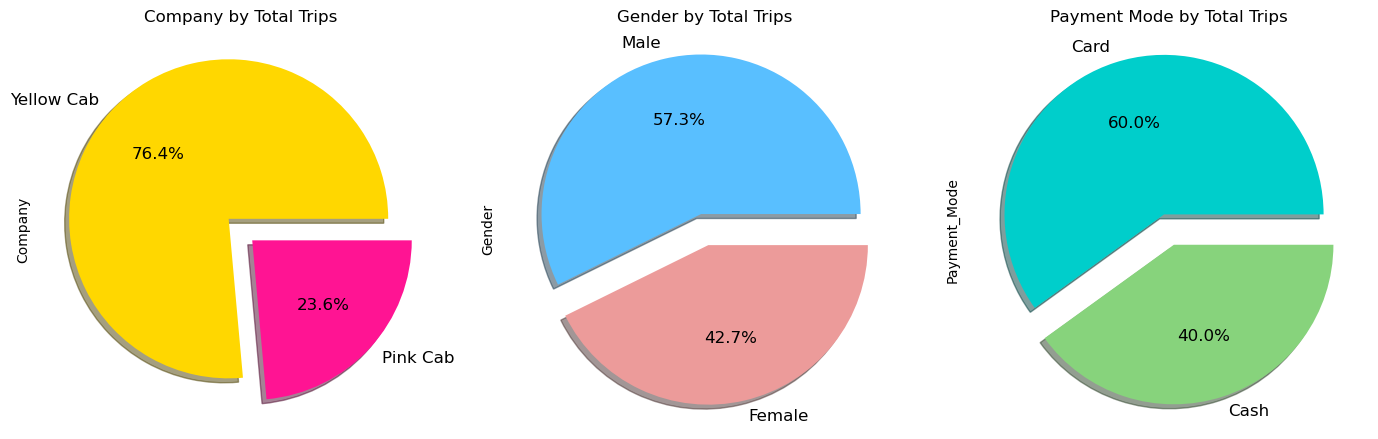

In [53]:
# Univariate Analysis

#Distribution of Bi-Categorical Columns
fig, axes = plt.subplots(1,3)

# Company
Company= data['Company'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=['gold','deeppink'],textprops = {'fontsize':12}, ax=axes[0])
Company.set_title("Company by Total Trips")

# Gender
Gender= data['Gender'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#59BFFF","#EC9B9A"], textprops = {'fontsize':12}, ax=axes[1])
Gender.set_title("Gender by Total Trips")

# Payment mode
Payment_Mode= data['Payment_Mode'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#00CECB","#87D37C"],textprops = {'fontsize':12}, ax=axes[2])
Payment_Mode.set_title("Payment Mode by Total Trips")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

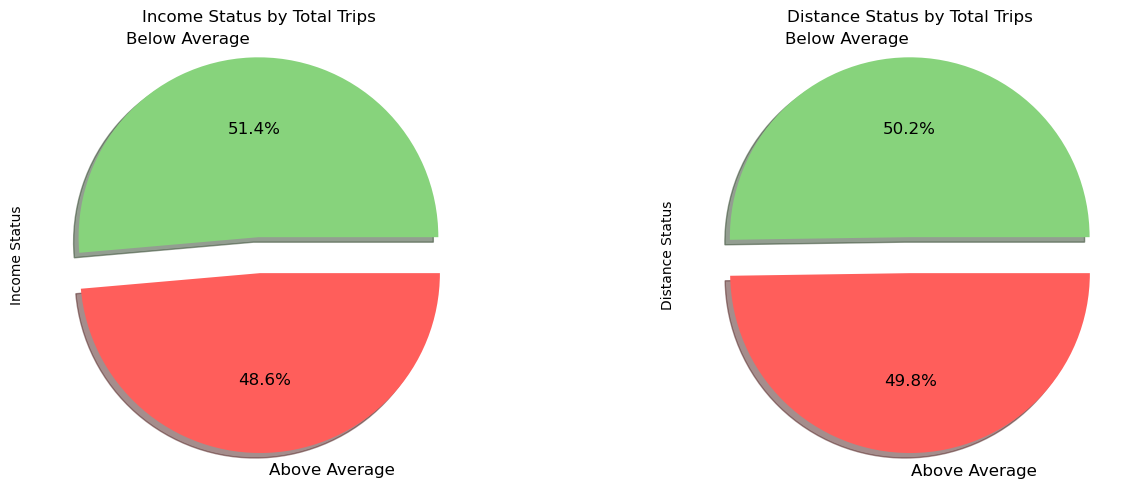

In [54]:
fig, axes = plt.subplots(1,2)

# 4.3.5 income status
Income= data['Income Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True, colors=["#87D37C","#FF5E5B"], textprops = {'fontsize':12}, ax=axes[0])
Income.set_title("Income Status by Total Trips")

# 4.3.6 distance status
Distance= data['Distance Status'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.1f%%',shadow=True,colors=["#87D37C","#FF5E5B"],textprops = {'fontsize':12}, ax=axes[1])
Distance.set_title("Distance Status by Total Trips")

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

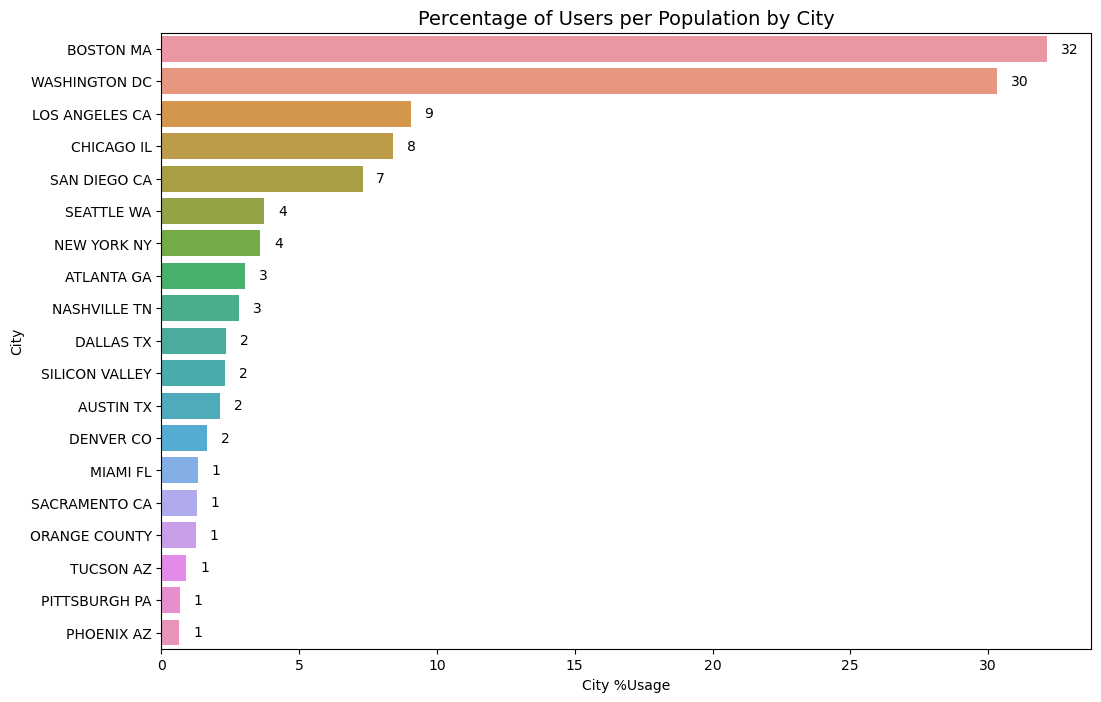

In [55]:
# Cities by Company and City Usage
plt.figure(figsize=(12,8))

usage=sns.barplot(y="City", x='City %Usage', data=data.sort_values(by='City %Usage', ascending=False), orient="h", ci=None)
usage.set_title("Percentage of Users per Population by City", fontsize=14)

# label each bar in barplot
for p in usage.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
    # adding text to each bar
    usage.text(x = width+0.5, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center

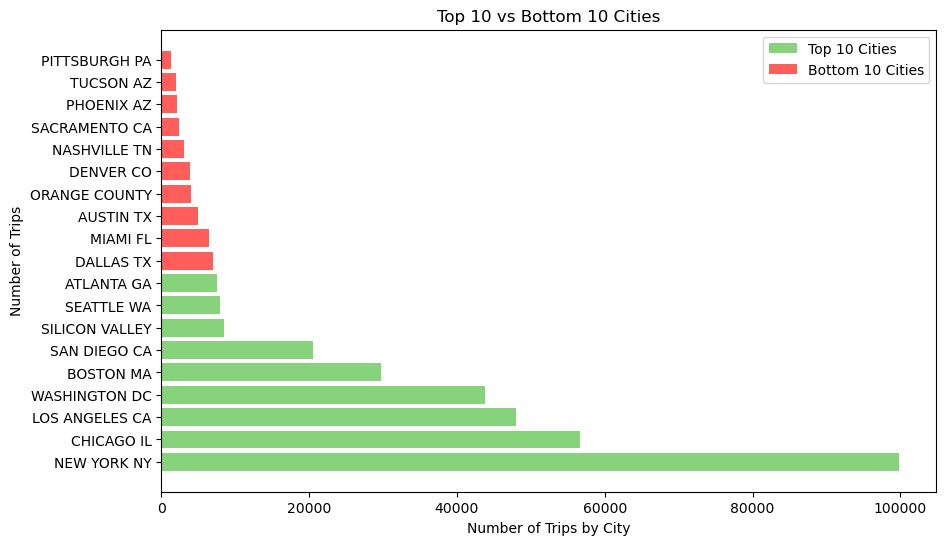

In [56]:
# Count the number of transactions for each city
city_counts = data['City'].value_counts()

# Slice the top and bottom 10 cities
top_cities = city_counts[:10]
bottom_cities = city_counts[-10:]

# Create a combined bar plot for the top and bottom cities
fig, ax = plt.subplots(figsize=(10,6))
ax.barh(top_cities.index, top_cities.values, color = "#87D37C", label='Top 10 Cities')
ax.barh(bottom_cities.index, bottom_cities.values, color = '#FF5E5B', label='Bottom 10 Cities')
ax.set_title('Top 10 vs Bottom 10 Cities')
ax.set_xlabel('Number of Trips by City')
ax.set_ylabel('City')
ax.legend()
plt.show()

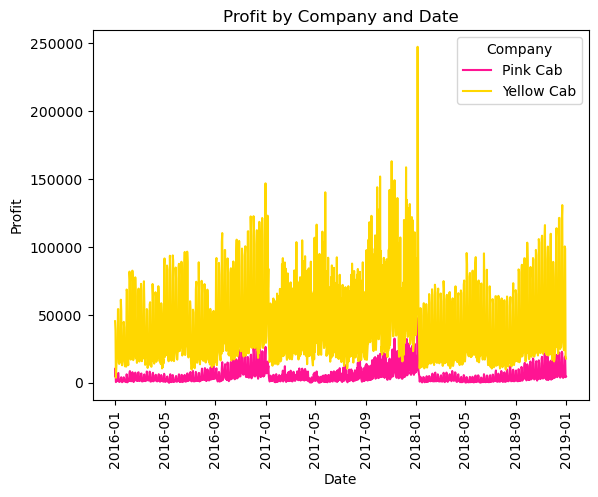

In [57]:
# Create a new dataframe with the sum of profit per date and company
profit_by_date = data.groupby(['Date of Travel','Company'])['Profit'].sum().reset_index()
profit_by_date.columns = ['Date', 'Company', 'Profit']

# Create the line plot
sns.lineplot(x = 'Date', y = 'Profit', data = profit_by_date, hue = 'Company', palette = company_palette)

# Set the title and axis labels
plt.title('Profit by Company and Date')
plt.xlabel('Date')
plt.ylabel('Profit')
plt.tick_params(axis='x', rotation=90)

# Show the plot
plt.show()

## 4.0 HYPOTHESIS TESTS AND RESULTS

### 4.1 Test 1

In [67]:
# Test 1: Is there a difference in average profit between customers who pay with card and those who pay with cash?

# H0 = There is no difference in average profit between customers who pay with card and those who pay with cash
# H1 = Customers who pay with card are more likely to generate more profit on average

from scipy import stats

# Subset the data into two groups based on payment mode
card_data = data[data['Payment_Mode'] == 'Card']['Profit']
cash_data = data[data['Payment_Mode'] == 'Cash']['Profit']

# Perform a t-test to compare the means of the two groups
t_stat, p_val = stats.ttest_ind(card_data, cash_data, equal_var=False)

# Print the t-statistic and p-value
print('t-statistic: ', t_stat)
print('p-value: ', p_val)


t-statistic:  -0.7620618620573147
p-value:  0.44602366904442836


Result 1: We accept the Null Hypothesis (H0) in Test 1: There is no difference in average profit between customers who pay with card and those who pay with cash
Reason: We accept the H0 because the p-value is NOT less than 0.05 or it's greater than 0.05

Payment_Mode
Card    137.086458
Cash    137.502923
Name: Profit, dtype: float64


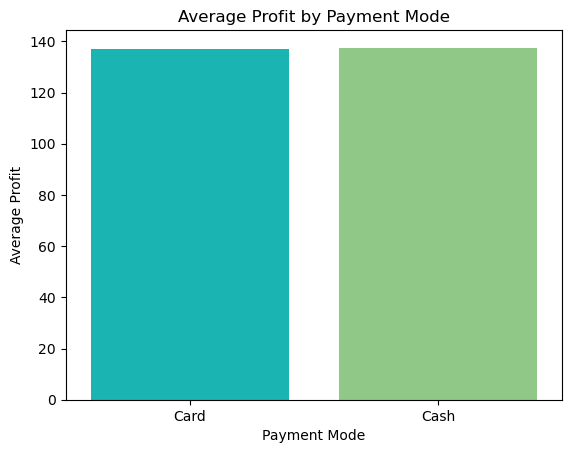

In [58]:
# FURTHER ANALYSIS

# Group the data by payment mode and calculate the average profit
profit_by_payment = data.groupby('Payment_Mode')['Profit'].mean()
print(profit_by_payment)

# Visualize the data
sns.barplot(profit_by_payment.index, profit_by_payment, palette=payment_palette)
plt.xlabel('Payment Mode')
plt.ylabel('Average Profit')
plt.title('Average Profit by Payment Mode')
plt.show()

### 4.2 Test 2

The Pearson correlation coefficient between distance traveled and price charged is 0.8357531580209407 with a p-value of 0.0
The Pearson correlation coefficient between distance traveled and profit is 0.4627681817539399 with a p-value of 0.0


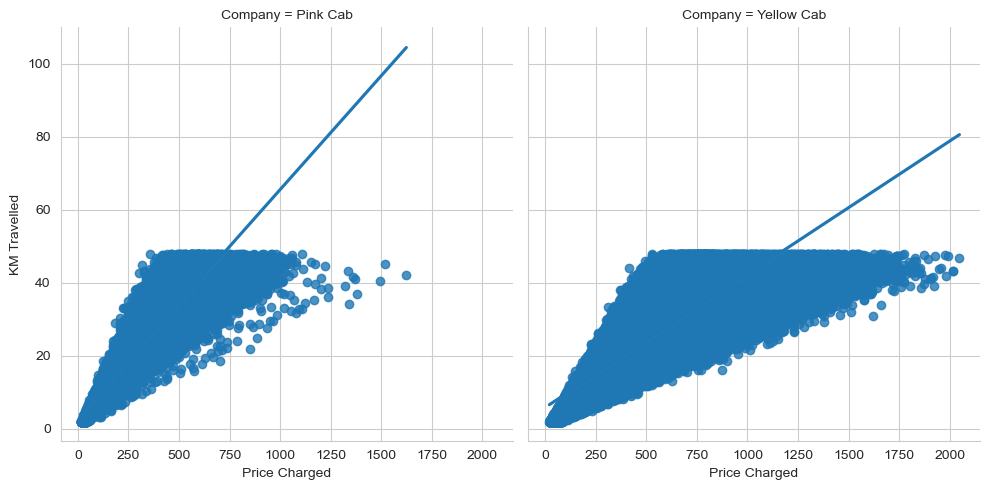

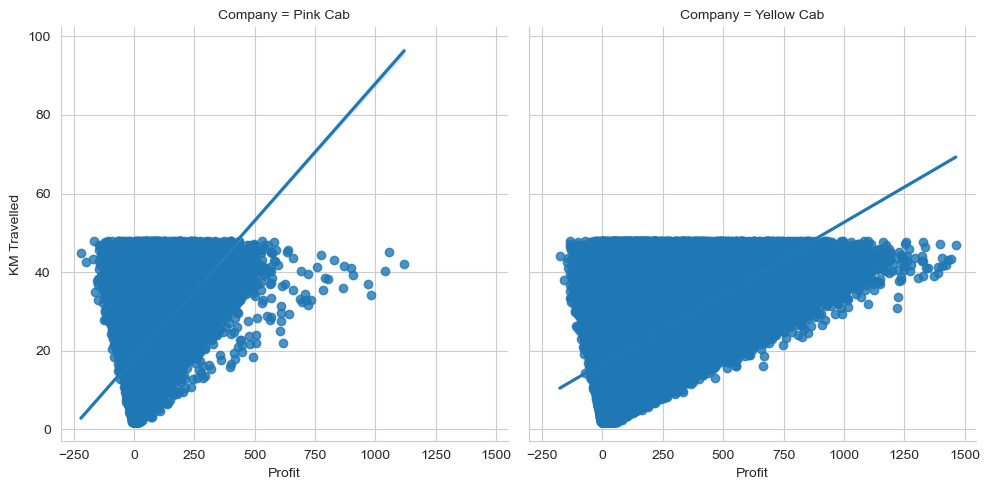

In [78]:
# Test 2: Is distance travelled positively correlated with the price charged and profit?

# H0 = There is no positive correlation between distance traveled and price charged or profit gained
# H1 = The distance traveled is positively correlated with the price charged and profit

# calculate the Pearson correlation coefficient between distance traveled and price charged
from scipy.stats import pearsonr

distance = data['KM Travelled']
price = data['Price Charged']

correlation, p_value = pearsonr(distance, price)

print("The Pearson correlation coefficient between distance traveled and price charged is", correlation, "with a p-value of", p_value)

# calculate the Pearson correlation coefficient between distance traveled and profit
profit = data['Profit']

correlation, p_value = pearsonr(distance, profit)

print("The Pearson correlation coefficient between distance traveled and profit is", correlation, "with a p-value of", p_value)

# Visualize Test Result
sns.lmplot(y='KM Travelled', x='Price Charged', data=data, hue=None, col='Company', palette=company_palette)
sns.lmplot(y='KM Travelled', x='Profit', data=data, hue=None, col='Company', palette=company_palette)

Result 2: We reject the Null Hypothesis (H0) - which means the distance traveled is positively correlated with the price charged and profit
Reason: The correlation (0.83) is approximately 1 and p-value (0.00) is less than 0.05, hence we reject the null hypothesis and accept the alternative hypothesis. Admittedly, the correlation for the profit is not as strongly correlated with the distance as that of the price, but this doesn't alter our result because the p-value is still less than 0.05.


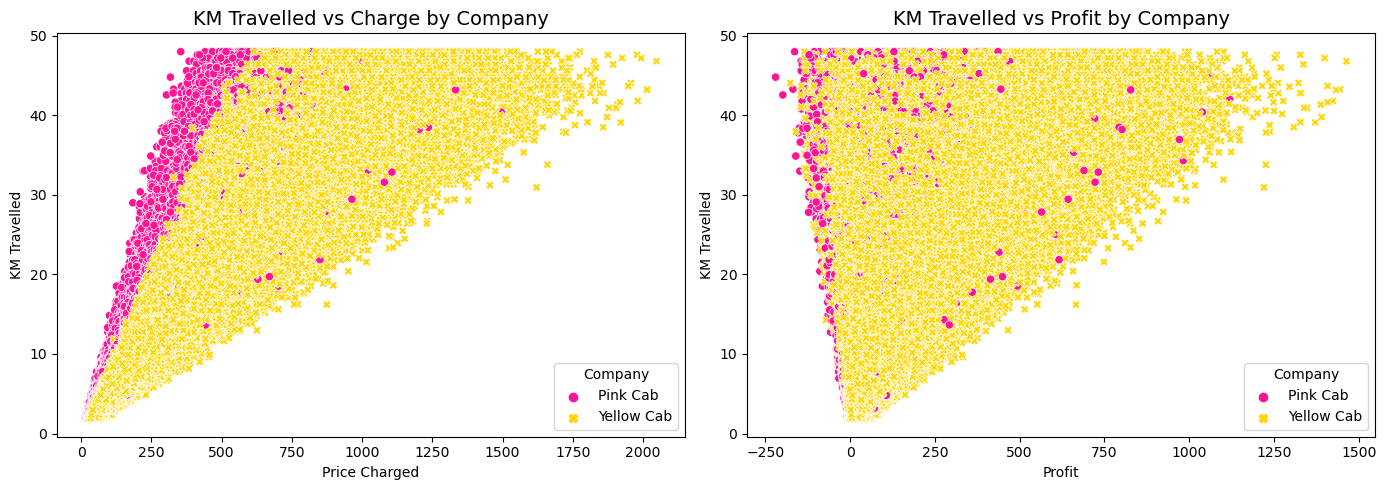

In [59]:
# FURTHER ANALYSIS

#Trends and Relationships
fig, axes = plt.subplots(1,2)

# 4.8.5 scatterplot => KM Travlled vs Charge
km_price=sns.scatterplot(y="KM Travelled", x='Price Charged', hue="Company", style='Company', palette = company_palette, data=data,ax=axes[0])
km_price.set_title("KM Travelled vs Charge by Company", fontsize=14)

# 4.8.6 Cost per KM vs Charge per KM
cost_charge=sns.scatterplot(y="KM Travelled", x='Profit', hue="Company", style='Company', palette = company_palette, data=data,ax=axes[1])
cost_charge.set_title("KM Travelled vs Profit by Company", fontsize=14)

fig.set_size_inches(14,5)
plt.tight_layout()
plt.show()

### 4.3 Test 3

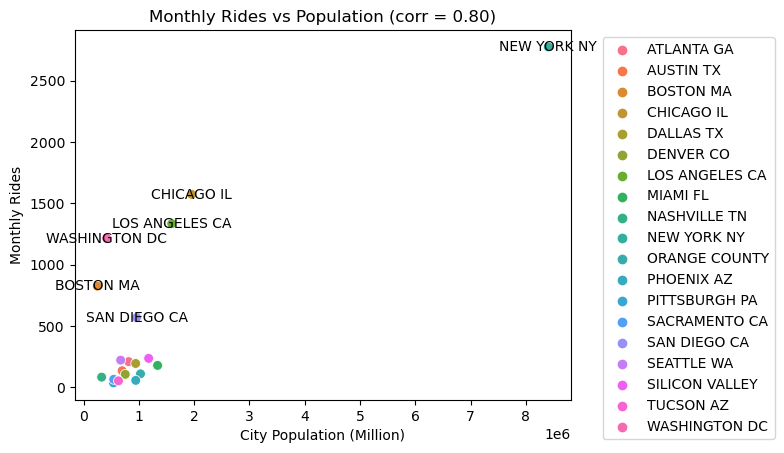

In [66]:
# Test 3: Is cab usage higher in larger cities with more population?

# H0: There is no significant correlation between the population of a city and the number of monthly rides
# H1: There is a significant correlation between the population of a city and the number of monthly rides

# Group the data by city and calculate the average number of rides per month
monthly_rides_by_city = data.groupby('City')['Transaction ID'].nunique() / 36

# Merge the monthly rides data with the city data
monthly_rides_data = pd.merge(monthly_rides_by_city, city, on='City')


# Calculate the correlation coefficient between monthly rides and population
corr = np.corrcoef(monthly_rides_data['Population'], monthly_rides_data['Transaction ID'])[0,1]

# Visualize the relationship between monthly rides and city population
ax = sns.scatterplot(x='Population', y='Transaction ID', data=monthly_rides_data, hue='City', s=50)

# Add labels to the bubbles greater than 500 monthly rides on the y-axis
for i, row in monthly_rides_data.iterrows():
    if row['Transaction ID'] > 500:
        ax.text(row['Population'], row['Transaction ID'], row['City'], ha='center', va='center')

# Set the x and y axis labels and title
plt.xlabel('City Population (Million)')
plt.ylabel('Monthly Rides')
plt.title(f'Monthly Rides vs Population (corr = {corr:.2f})')

# Move legend to the right and outside the plot area
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


In [79]:
# Statistically...

from scipy.stats import pearsonr, t

# Calculate the correlation coefficient and p-value
r, p = pearsonr(monthly_rides_data['Population'], monthly_rides_data['Transaction ID'])

# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {r:.2f}, p-value: {p:.2f}")

# Calculate the degrees of freedom
df = len(monthly_rides_data) - 2

# Calculate the critical t-value for a two-tailed test with alpha = 0.05
t_crit = t.ppf(1 - 0.025, df)

# Calculate the test statistic
t_stat = r * np.sqrt(df) / np.sqrt(1 - r**2)

# Print the test statistic and critical t-value
print(f"Test statistic: {t_stat:.2f}, critical t-value: {t_crit:.2f}")

# Check if the test statistic is significant
if abs(t_stat) > t_crit:
    print("The correlation is significant.")
else:
    print("The correlation is not significant.")


Correlation coefficient: 0.80, p-value: 0.00
Test statistic: 5.54, critical t-value: 2.11
The correlation is significant.


Result 3: We can reject the null hypothesis and conclude that there is a significant correlation between the population of a city and the number of monthly rides. 
Reason: Since the Test statistic is greater than the critical t-value, and which means it is significant enough, we reject the null hypothesis.

The visualization helps us investigate the hypothesis that cities with higher populations have more monthly rides. We can see that there is a positive correlation between population and monthly rides, with a correlation coefficient of 0.80. This suggests that our hypothesis is likely true. However, we can also see that there are some cities with lower populations (Boston, Washington DC) that have a high number of monthly rides, while some cities with higher populations have a lower number of monthly rides. This suggests that there may be other factors at play that affect the number of monthly rides.

### 4.4 Test 4

                sum_sq        df            F  PR(>F)
Q("Day")  2.243622e+14       6.0  2419.414422     0.0
Residual  5.554541e+15  359385.0          NaN     NaN


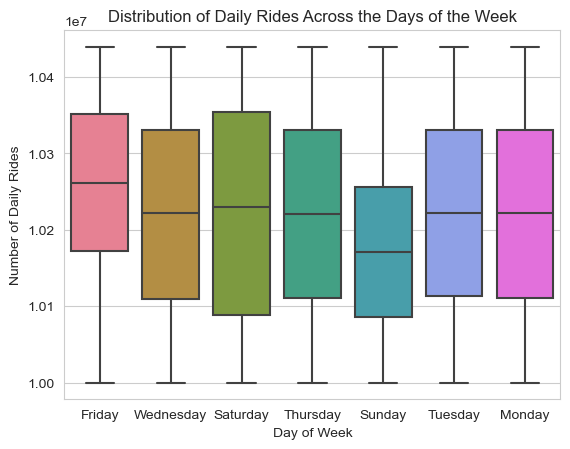

In [82]:
# Hypothesis 4: Are there specific days of the week when demand for cab services is higher?

# H0 = There is NO statistically significant difference in the average daily rides across different days of the week
# H1 = There is a statistically significant difference in the average daily rides across different days of the week 

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Group the data by day of the week and calculate the average number of rides per day
rides_by_day = data.groupby('Day')['Transaction ID'].nunique() / 1095

# Create a boxplot to visualize the distribution of daily rides across the days of the week
sns.boxplot(x='Day', y='Transaction ID', data=data)

# Set the x and y axis labels and title
plt.xlabel('Day of Week')
plt.ylabel('Number of Daily Rides')
plt.title('Distribution of Daily Rides Across the Days of the Week')

# Conduct a one-way ANOVA test to compare the average number of daily rides across the days of the week
model = ols('Q("Transaction ID") ~ Q("Day")', data=data).fit()
table = sm.stats.anova_lm(model, typ=2)
print(table)


Result 4: We can reject the null hypothesis and conclude that there is a statistically significant difference in the average daily rides across different days of the week.
Reason: Since the the p-value (PR(>F)) is very small (0.0), this means that we can reject the null hypothesis

<Figure size 1200x600 with 0 Axes>

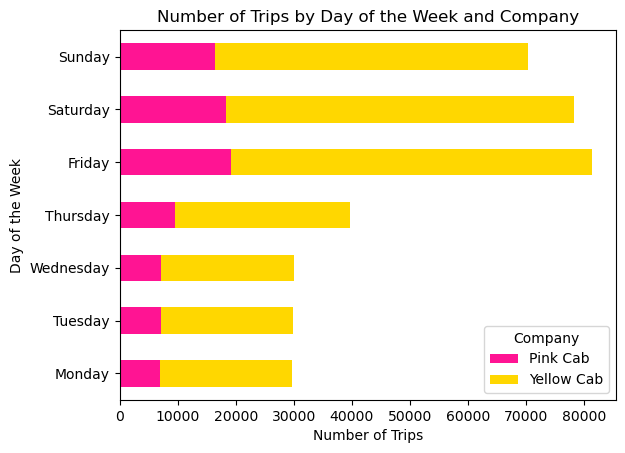

In [61]:
# FURTHER ANALYSIS

# Calculate the total number of trips for each day and company
trips_by_day_company = data.groupby(['Day', 'Company'])['Transaction ID'].count().reset_index()

# Define the order of the days of the week
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Day' column to a Categorical data type with the defined order
trips_by_day_company['Day'] = pd.Categorical(trips_by_day_company['Day'], categories=days_order, ordered=True)

# Pivot the table to create a stacked bar chart
stacked_data = trips_by_day_company.pivot(index='Day', columns='Company', values='Transaction ID')

# Create the stacked bar chart
plt.figure(figsize=(12,6))
stacked_data.plot(kind='barh', stacked=True, color = ['deeppink','gold'])
plt.title('Number of Trips by Day of the Week and Company')
plt.xlabel('Number of Trips')
plt.ylabel('Day of the Week')
plt.show()


### 4.5 Test 5

                  sum_sq        df            F  PR(>F)
Q("Month")  5.485106e+14      11.0  3426.193452     0.0
Residual    5.230393e+15  359380.0          NaN     NaN


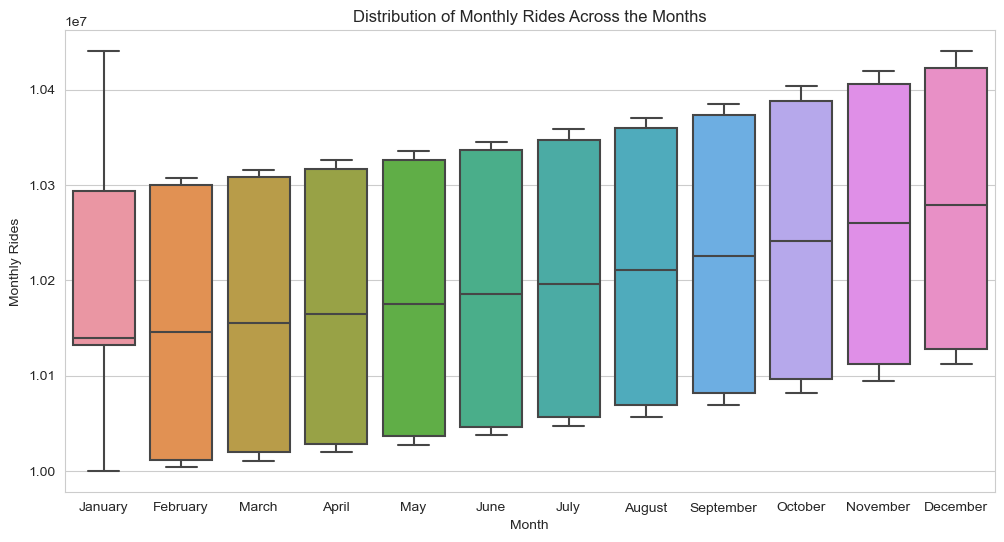

In [94]:
# Hypothesis 5: Are there specific Months of the year when demand for cab services is higher?

# H0 = There is NO statistically significant difference in the average monthly rides across different Months
# H1 = There is a statistically significant difference in the average monthly rides across different Months

# Group the data by Month and calculate the average number of rides per month
rides_by_month = data.groupby('Month')['Transaction ID'].nunique() / 36

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Create a boxplot to visualize the distribution of monthly rides across the Month
sns.boxplot(x='Month', y='Transaction ID', data=data, ax=ax)

# Set the x and y axis labels and title
ax.set_xlabel('Month')
ax.set_ylabel('Monthly Rides')
ax.set_title('Distribution of Monthly Rides Across the Months')

# Adjust the spacing between subplots
fig.subplots_adjust(wspace=0.3)

# Conduct a one-way ANOVA test to compare the average monthly rides across the Month
model_month = ols('Q("Transaction ID") ~ Q("Month")', data=data).fit()
table_month = sm.stats.anova_lm(model_month, typ=2)
print(table_month)


Result 5: We can reject the null hypothesis and conclude that there is a statistically significant difference in the average monthly rides across different Months
Reason: Since the the p-value, PR(>F) is very small (0.0), this means that we can reject the null hypothesis

<Figure size 1200x600 with 0 Axes>

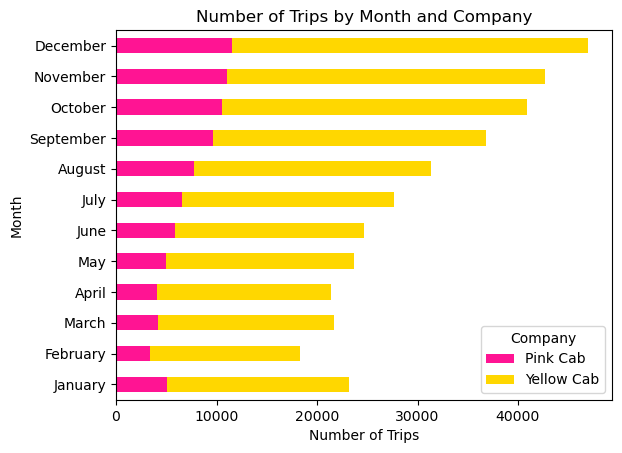

In [62]:
# FURTHER ANALYSIS

# Calculate the total number of trips for each month and company
trips_by_month_company = data.groupby(['Month', 'Company'])['Transaction ID'].count().reset_index()

# Define the order of the months
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Pivot the table to create a stacked bar chart
stacked_data = trips_by_month_company.pivot(index='Month', columns='Company', values='Transaction ID')
stacked_data = stacked_data.reindex(month_order)

# Create the stacked bar chart
plt.figure(figsize=(12,6))
stacked_data.plot(kind='barh', stacked=True, color=['deeppink', 'gold'])
plt.title('Number of Trips by Month and Company')
plt.xlabel('Number of Trips')
plt.ylabel('Month')
plt.show()


### 4.6 Test 6

In [95]:
# Hypothesis 6: Do customers of different age groups have different payment preferences?

# H0 = There is NO difference in payment preferences between different age groups.
# H1 = There is difference in payment preferences between different age groups.

# Create a contingency table of age group and payment method
contingency_table = pd.crosstab(data['Age'], data['Payment_Mode'])

# Perform the chi-squared test
chi2_statistic, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Print the results of the chi-squared test
print("Chi-squared statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)


Chi-squared statistic: 63.33145967898115
p-value: 0.05610251903391298
Degrees of freedom: 47


Result 6:The p-value of 0.0561 is slightly above the commonly used significance level of 0.05. This suggests that there is NOT ENOUGH EVIDENCE to reject the null hypothesis that there is no difference in payment preferences between different age groups.

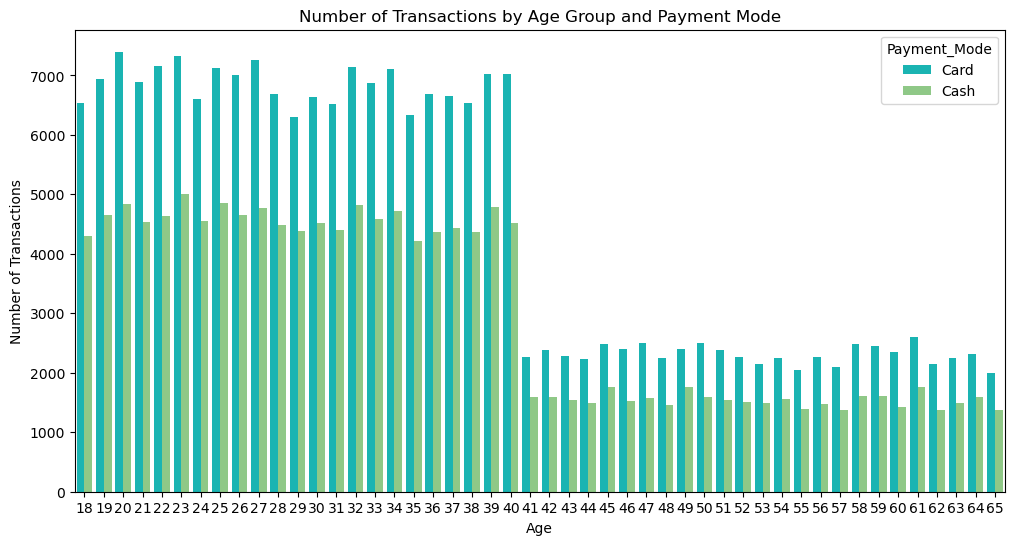

In [63]:
# FURTHER ANALYSIS

# Create a bar plot showing the number of transactions for each age group, separated by payment method
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='Payment_Mode', data=data, palette=payment_palette)
plt.title('Number of Transactions by Age Group and Payment Mode')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.show()

### 4.7 Test 7

In [96]:
# Hypothesis 7: Are there specific customer gender that are more likely to use cab services?

# H0 = There is NO statistically significant association between age and gender with respect to the number of cab service transactions
# H1 = There is statistically significant association between age and gender with respect to the number of cab service transactions

from scipy.stats import chi2_contingency

# Create a contingency table of Age group and Gender
cont_table = pd.crosstab(data['Age'], data['Gender'])

# Print the contingency table
print(cont_table)

# Perform the chi-squared test of independence
chi2_stat, p_val, dof, expected = chi2_contingency(cont_table)

# Print the results of the test
print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_val)
print("Degrees of freedom:", dof)


Gender  Female  Male
Age                 
18        4703  6143
19        4581  7010
20        5595  6634
21        4809  6622
22        5403  6393
23        4980  7347
24        5235  5916
25        4754  7219
26        4810  6845
27        5236  6794
28        4934  6229
29        4742  5933
30        5021  6144
31        4910  6020
32        5200  6759
33        4927  6530
34        4515  7310
35        4308  6247
36        4770  6284
37        4829  6257
38        4485  6421
39        4868  6930
40        4863  6673
41        1709  2143
42        1425  2545
43        1585  2238
44        1593  2132
45        1893  2355
46        1617  2301
47        1789  2298
48        1726  1974
49        1801  2357
50        1912  2177
51        1639  2292
52        1742  2042
53        1429  2212
54        1594  2216
55        1323  2119
56        1487  2255
57        1361  2112
58        1794  2313
59        1666  2402
60        1582  2193
61        1891  2470
62        1524  2006
63        163

Result 7: The p-value of 4.4576 is highly above the threshold of 0.05. This means that there is a strong evidence to reject the null hypothesis and conclude that there is a statistically significant association between age group and gender with respect to the number of cab service transactions

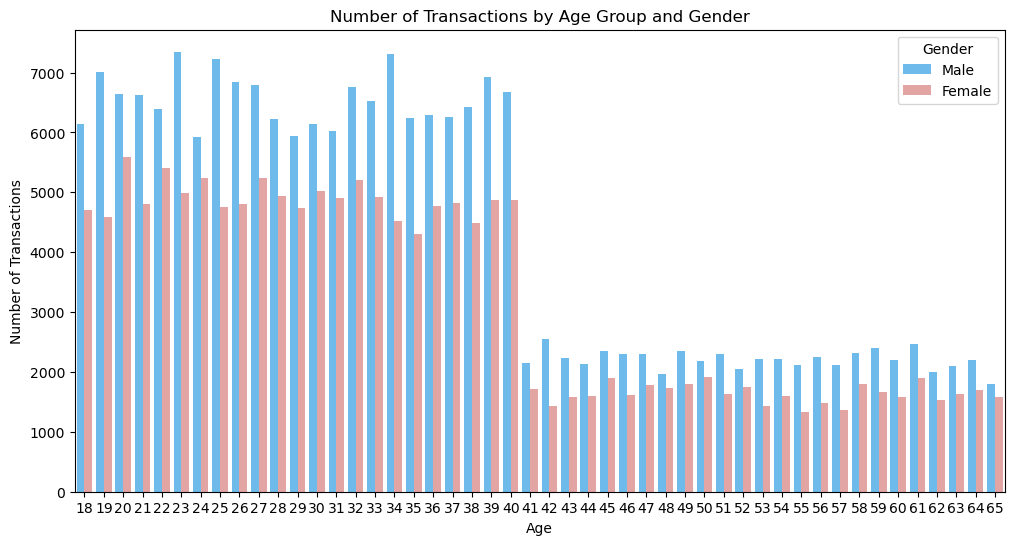

In [64]:
# FURTHER ANALYSIS

# Create a bar plot showing the number of transactions for each age group, separated by gender
plt.figure(figsize=(12,6))
sns.countplot(x='Age', hue='Gender', data=data, palette=gender_palette)
plt.title('Number of Transactions by Age Group and Gender')
plt.xlabel('Age')
plt.ylabel('Number of Transactions')
plt.show()

### 4.8 Test 8

In [97]:
#  Hypothesis 8: Is there a relationship between the number of rides and the US Holidays?

# H0 = There is NO relationship between the number of rides and US holidays
# H1 = There is a relationship between the number of rides and US holidays

# Create a contingency table of observed frequencies
holiday_table = pd.crosstab(merged['Holiday'], merged['Company'])

# Perform the chi-square test of independence
chi2_statistic, p_value, dof, expected_freq = stats.chi2_contingency(holiday_table)

# Print the results of the chi-square test
print("Chi-squared statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", dof)


Chi-squared statistic: 109.94820358712674
p-value: 1.2341465072215323e-15
Degrees of freedom: 17


Result 8: The p-value of 1.2341 is well above the determining level of 0.05. This means that there is a strong evidence to reject the null hypothesis and conclude that there is a relationship between the number of rides and US holidays

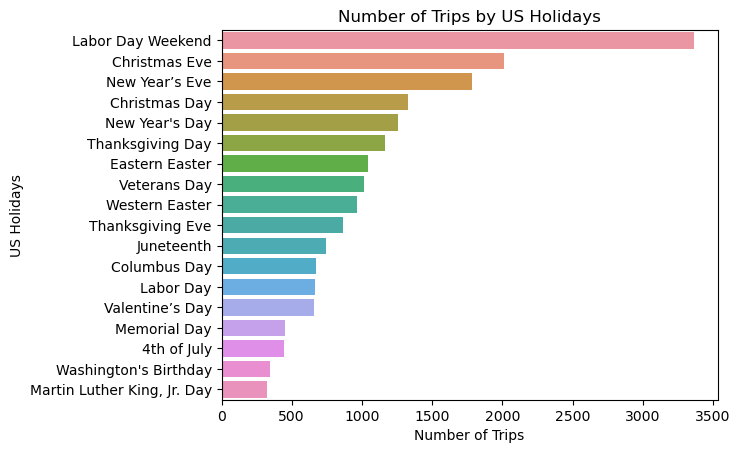

In [65]:
# FURTHER ANALYSIS

# Merge cab data with holiday data
merged = data.merge(us_holiday, how="left", left_on="Date of Travel", right_on="Date")

# Group data by holiday and count number of rides
rides_by_holiday = merged.groupby(["Holiday"])["Transaction ID"].count().reset_index()

# Plot the rides by holiday
rides_by_holiday = rides_by_holiday.sort_values(by='Transaction ID', ascending=False)
sns.barplot(y='Holiday', x='Transaction ID', data=rides_by_holiday, order=rides_by_holiday['Holiday'], orient='h')
plt.title('Number of Trips by US Holidays')
plt.ylabel('US Holidays')
plt.xlabel('Number of Trips')
plt.show()

## THE END!